In [1]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#given a tree and pickled model, predict top N probabilities and classes
from functions import *

#test data
table = 'contract-explorer-233919.ethparis.functions3'
limit = 'LIMIT 10000'

sql = '''
SELECT *  FROM `{}`
 {}
'''.format(table, limit)

df = client.query(sql, location='europe-west2').to_dataframe()



# #unpickle processing pipeline and model
# rf = pd.read_pickle('pickle/rf.p')


In [36]:
df.head()

,addr,hash,name,signature,tree,tree_hash,__index_level_0__
0,0x02c740252BdC9a08Cbd5DCca17DC8934F3a53bB5,0x03959bb7,setDataContract(address _dataContractAddress),setDataContract(address),"[[""IF"", [""ISZERO"", [""EQ"", ""CALLER"", [""STORAGE""...",99622948e415667a8bac87169eb89c464e70313b,8
1,0x02c740252BdC9a08Cbd5DCca17DC8934F3a53bB5,0xa39a45b7,replaceOwner(address _newOwner),replaceOwner(address),"[[""IF"", [""ISZERO"", [""EQ"", ""CALLER"", [""STORAGE""...",3d6fd050bb2aba87bbc89f1be980ad448788aeec,13
2,0x02c740252BdC9a08Cbd5DCca17DC8934F3a53bB5,0xad68ebf7,"migrate(address _to, uint256 _value)","migrate(address,uint256)","[[""IF"", [""ISZERO"", [""EQ"", ""CALLER"", [""STORAGE""...",0f4d19b0bb243cf569ede1ea37bb07bd357cd902,14
3,0x654Cc9EC854E118EF050a01B40c14716c22c4fcC,0x2e1a7d4d,withdraw(uint256 _amount),withdraw(uint256),"[[""IF"", [""LT"", [""ADD"", -4, ""CALLDATASIZE""], 32...",95bf4b2cca01e3ed721e9ce590f1a23d92b6f255,18
4,0x654Cc9EC854E118EF050a01B40c14716c22c4fcC,0x41c0e1b5,kill(),kill(),"[[""IF"", [""EQ"", ""CALLER"", [""STORAGE"", 160, 0, 2...",915b730c3f011221db2c67e7abf946255078ca2b,19


In [27]:
target = df.hash
trees = df.tree
pipe = pd.read_pickle('pickle/pipe.p')

In [28]:
def result_vector(trees, N=3):
    '''
    Input: list of JSON trees, N
    Output: Top N probabilities, Top N classes (lists)'''
    
    #run data preprocessing pipeline
    pp = Preprocess().fit_transform(trees)
    result_test = pipe.transform(pp)
    return result_test

In [29]:
vects = result_vector(trees, N=1)

In [100]:
time_start = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=1500,verbose=True,learning_rate=100)
tsne_results = tsne.fit_transform(vects)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.010s...
[t-SNE] Computed neighbors for 10000 samples in 0.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.935131
[t-SNE] KL divergence after 1500 iterations: 0.576076
t-SNE done! Time elapsed:

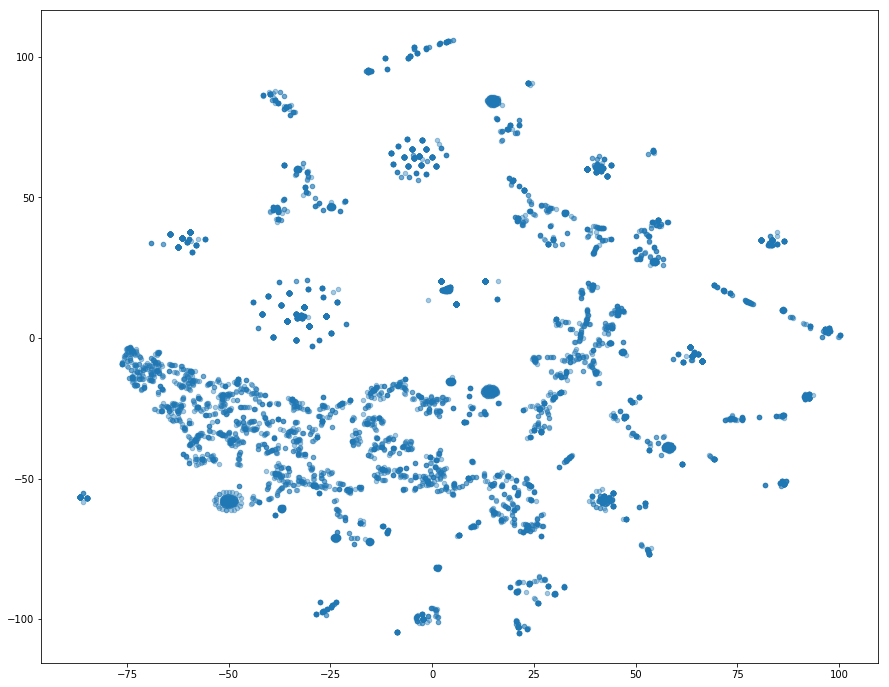

In [107]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)
plt.scatter(tsne_results[:,0], tsne_results[:,1], s=20, alpha=.4)

In [108]:
import requests

In [109]:
def get_name(sig):
    try:
        result = requests.get('https://www.4byte.directory/api/v1/signatures/?format=json&hex_signature={}'.format(sig))
        name = result.json()['results'][0]['text_signature']
    except:
        name='unknown'
    return name

In [110]:
len(df.signature.unique())

2282

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


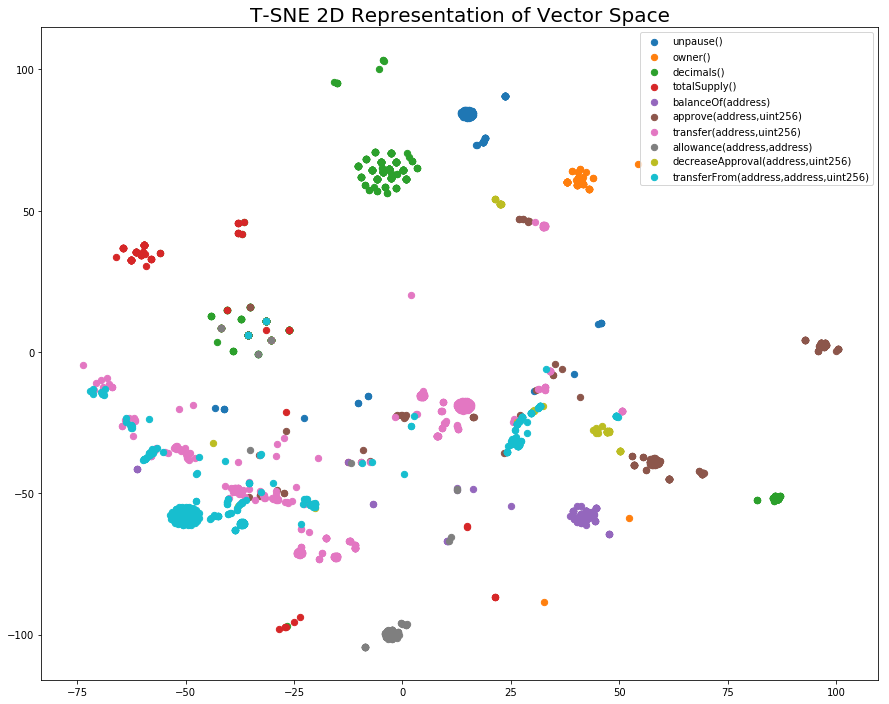

In [130]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)


NUM_COLORS = 10
cm = plt.get_cmap('tab10')

ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for name in df.signature.unique():
        mask = df.signature == name
        if np.sum(mask) <95:
            lbl = '_nolegend_'
        else:
            lbl = name
            plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=40, alpha=1,label=lbl)

plt.legend(bbox_to_anchor=[1, 1], loc='upper right')
plt.title('T-SNE 2D Representation of Vector Space', fontsize=20)
plt.savefig('tsne1.png', format='png')

In [57]:
df.signature.value_counts()

decimals()                                   680
transfer(address,uint256)                    489
transferFrom(address,address,uint256)        423
approve(address,uint256)                     248
totalSupply()                                143
unpause()                                    138
balanceOf(address)                           126
allowance(address,address)                   115
owner()                                       99
decreaseApproval(address,uint256)             96
transferOwnership(address)                    90
burn(uint256)                                 77
name()                                        42
INITIAL_SUPPLY()                              41
symbol()                                      40
withdraw()                                    40
increaseApproval(address,uint256)             38
mint(address,uint256)                         36
approveAndCall(address,uint256,bytes)         34
acceptOwnership()                             32
pause()             

In [102]:
mask1 = np.array([s== 'transfer(address,uint256)' for s in df.signature])
mask2 =  np.array([s== 'transferFrom(address,address,uint256)' for s in df.signature])


In [103]:
subvect = vects[mask1|mask2]
sublabel = df.signature[mask1|mask2]

In [126]:
time_start = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=1500,verbose=True,learning_rate=100)
tsne_results_sub = tsne.fit_transform(subvect)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 912 samples in 0.000s...
[t-SNE] Computed neighbors for 912 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 912 / 912
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.511967
[t-SNE] KL divergence after 1500 iterations: 0.215839
t-SNE done! Time elapsed: 5.083698987960815 seconds


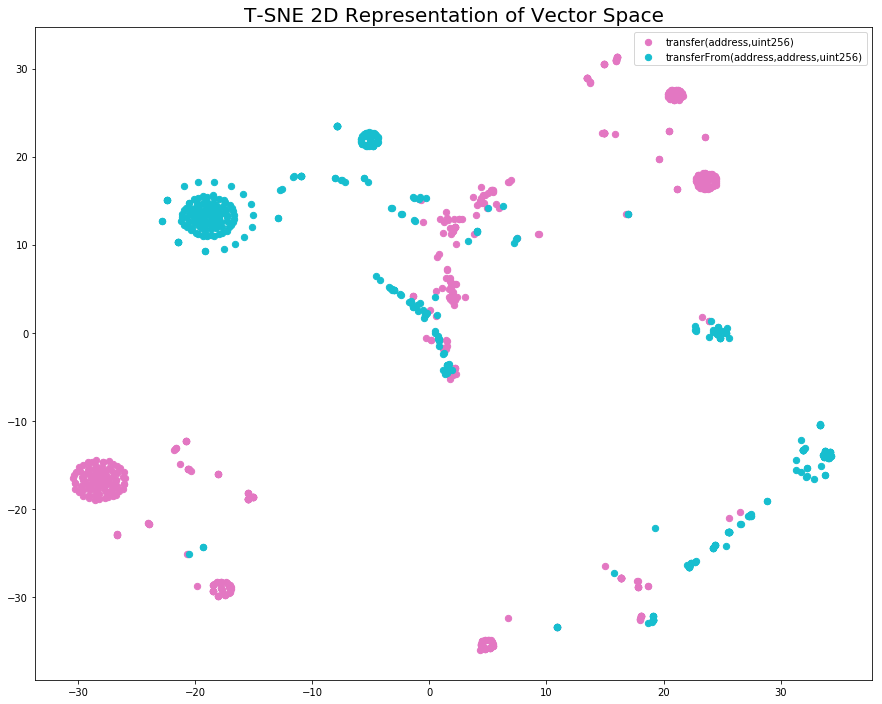

In [131]:
fig = plt.figure(figsize=(15,12))
ax = fig.add_subplot(111)

for name in sublabel.unique():
        if name == 'transfer(address,uint256)':
            c=(0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
        else:
            c=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529)
        mask = sublabel == name
        if np.sum(mask) <95:
            lbl = '_nolegend_'
        else:
            lbl = name
            plt.scatter(tsne_results_sub[mask][:,0], tsne_results_sub[mask][:,1], s=40, c=c,alpha=1,label=lbl)

plt.legend(bbox_to_anchor=[1, 1], loc='upper right')
plt.title('T-SNE 2D Representation of Vector Space', fontsize=20)
plt.savefig('tsne2.png', format='png')

In [128]:
import matplotlib
for i in range(cm.N):
    rgb = cm(i)[:3] # will return rgba, we take only first 3 so we get rgb
    print(matplotlib.colors.to_rgb(rgb))

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
(1.0, 0.4980392156862745, 0.054901960784313725)
(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
(0.5803921568627451, 0.403921568627451, 0.7411764705882353)
(0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
(0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
(0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
(0.09019607843137255, 0.7450980392156863, 0.8117647058823529)
